In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [33]:
df=pd.read_csv("C:/Users/bisra/Desktop/SIC/data_studentlist.csv")

In [34]:
df.head()

,name,gender,age,grade,absence,bloodtype,height,weight
0,Jared Diamond,M,23,3,Y,O,165.3,68.2
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0
2,Brian Martin,M,24,4,N,B,175.0,80.1
3,David Hassel,M,23,3,N,AB,182.1,85.7
4,Clara Rodriquez,F,20,1,Y,A,168.0,49.5


In [35]:
df1=df.loc[7:,['name','bloodtype','weight','height']]

In [36]:
df2=df.loc[:10,]

#### Merge two dataframes [inner, left, right, outer join]

In [37]:
df_merged_inner=df1.merge(df2, how='inner')
df_merged_left=df1.merge(df2, how='left')
df_merged_right=df1.merge(df2, how='right')
df_merged_outer=df1.merge(df2, how='outer')
df_merged_inner

,name,bloodtype,weight,height,gender,age,grade,absence
0,Margareth Jones,A,55.0,176.9,F,23,1,N
1,John Bertsch,B,64.2,178.5,M,23,3,N
2,Jake Timmerman,B,61.3,176.1,M,22,2,N
3,Joshua Connor,O,62.0,167.1,M,24,4,Y


## Concat data from different sources

#### Merge data from data.csv and data.json files

In [38]:
df_csv=pd.read_csv("C:/Users/bisra/Desktop/SIC/data.csv")
df_csv.drop(columns=['Unnamed: 0'], inplace=True)
df_csv

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,ground_clearance_mm,height
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,198.991252,2354.830006
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,154.594484,2273.383573
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,185.360640,2607.497868
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,159.031913,2774.271298
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,169.089797,2936.955633
...,...,...,...,...,...,...,...,...,...,...,...
195,29.0,4,85.0,52.0,2035,22.2,76,usa,chevrolet chevette,172.591394,2526.914355
196,24.5,4,98.0,60.0,2164,22.1,76,usa,chevrolet woody,183.935089,2090.786687
197,29.0,4,90.0,70.0,1937,14.2,76,europe,vw rabbit,166.609701,2635.377473
198,33.0,4,91.0,53.0,1795,17.4,76,japan,honda civic,177.604984,2417.368326


In [39]:
df_json=pd.read_json("C:/Users/bisra/Desktop/SIC/data.json")
df_json

,cylinders,displacement,hp,weight,acceleration,model_year,country,Name,kmpl,ground_clearance
0,4,91,53.0,1795,17.4,76,japan,honda civic,14.029752,6.992322
1,6,225,100.0,3651,17.7,76,usa,dodge aspen se,8.502880,6.528875
2,6,250,78.0,3574,21.0,76,usa,ford granada ghia,7.652592,6.146452
3,6,250,110.0,3645,16.2,76,usa,pontiac ventura sj,7.865164,6.889165
4,6,258,95.0,3193,17.8,76,usa,amc pacer d/l,7.440020,6.109136
...,...,...,...,...,...,...,...,...,...,...
195,4,140,86.0,2790,15.6,82,usa,ford mustang gl,11.478888,6.860077
196,4,97,52.0,2130,24.6,82,europe,vw pickup,18.706336,6.428238
197,4,135,84.0,2295,11.6,82,usa,dodge rampage,13.604608,6.221259
198,4,120,79.0,2625,18.6,82,usa,ford ranger,11.904032,7.631045


In [40]:
mapper={
    "horsepower":"hp",
    "origin":"country",
    "name":"Name",
}
df_csv.rename(columns=mapper, inplace=True)

df_csv['mpg']=df_csv['mpg']*0.425144
df_csv.rename(columns={"mpg":"kmpl"},inplace=True)
df_csv.drop('height',axis=1)

,kmpl,cylinders,displacement,hp,weight,acceleration,model_year,country,Name,ground_clearance_mm
0,7.652592,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,198.991252
1,6.377160,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,154.594484
2,7.652592,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,185.360640
3,6.802304,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,159.031913
4,7.227448,8,302.0,140.0,3449,10.5,70,usa,ford torino,169.089797
...,...,...,...,...,...,...,...,...,...,...
195,12.329176,4,85.0,52.0,2035,22.2,76,usa,chevrolet chevette,172.591394
196,10.416028,4,98.0,60.0,2164,22.1,76,usa,chevrolet woody,183.935089
197,12.329176,4,90.0,70.0,1937,14.2,76,europe,vw rabbit,166.609701
198,14.029752,4,91.0,53.0,1795,17.4,76,japan,honda civic,177.604984


In [43]:
df_concat=pd.concat([df_csv,df_json])
df_concat

,kmpl,cylinders,displacement,hp,weight,acceleration,model_year,country,Name,ground_clearance_mm,height,ground_clearance
0,7.652592,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,198.991252,2354.830006,NaN
1,6.377160,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,154.594484,2273.383573,NaN
2,7.652592,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,185.360640,2607.497868,NaN
3,6.802304,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,159.031913,2774.271298,NaN
4,7.227448,8,302.0,140.0,3449,10.5,70,usa,ford torino,169.089797,2936.955633,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
195,11.478888,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,NaN,NaN,6.860077
196,18.706336,4,97.0,52.0,2130,24.6,82,europe,vw pickup,NaN,NaN,6.428238
197,13.604608,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,NaN,NaN,6.221259
198,11.904032,4,120.0,79.0,2625,18.6,82,usa,ford ranger,NaN,NaN,7.631045


#### What are the similarities and difference in the two sources
CSV (Comma-Separated Values) and JSON (JavaScript Object Notation) are both widely used formats for storing structured data. CSV is straightforward, storing data in tabular form with rows and columns separated by commas, making it suitable for spreadsheet-like data. JSON, on the other hand, uses a hierarchical format with key-value pairs or arrays, making it ideal for complex data structures and nested data relationships. While CSV lacks built-in typing and schema definitions, JSON supports various data types directly and allows for more explicit schema representation, catering to more diverse data needs in modern applications.

#### Plot the following plots using dummy data in both matplotlib andseaborn

Bar plot
Histogram (play with: density, bins, alpha)
Boxplot [ Multiple varables, vertical, ]
Lineplot [linestyle, markerstyles]
Scatter plot

## Matplot

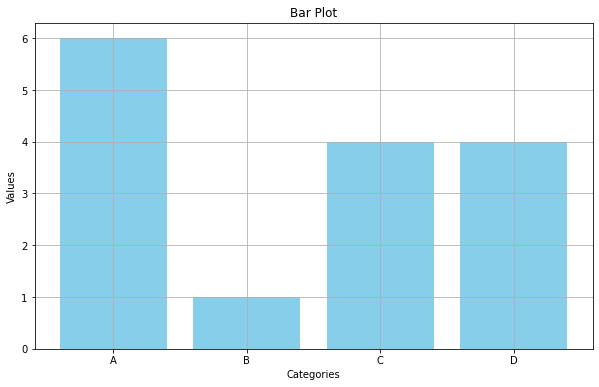

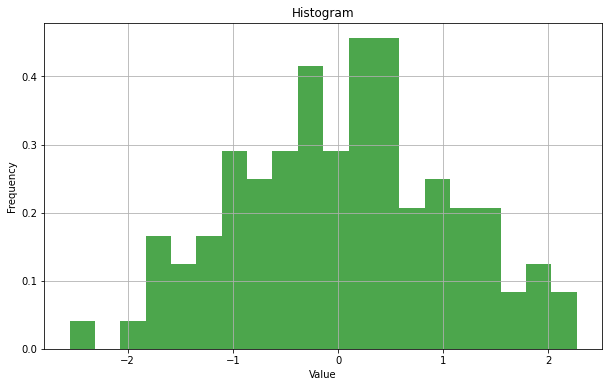

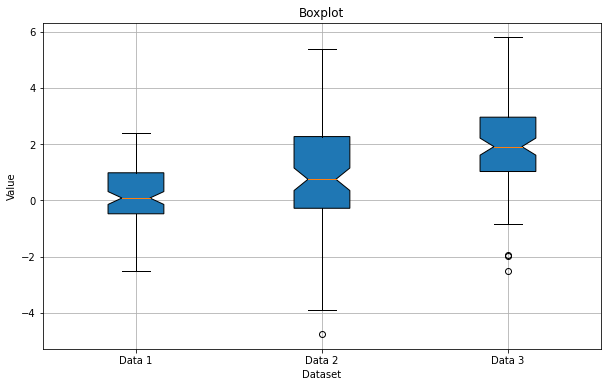

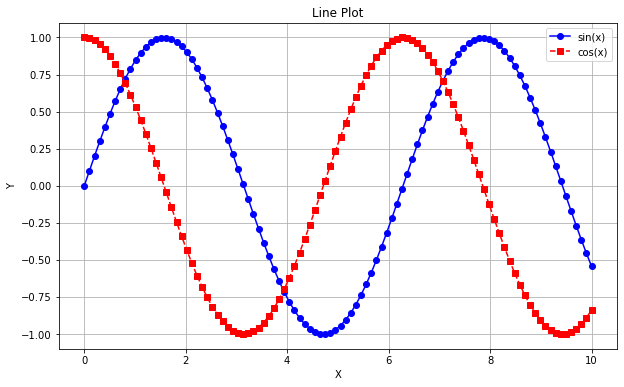

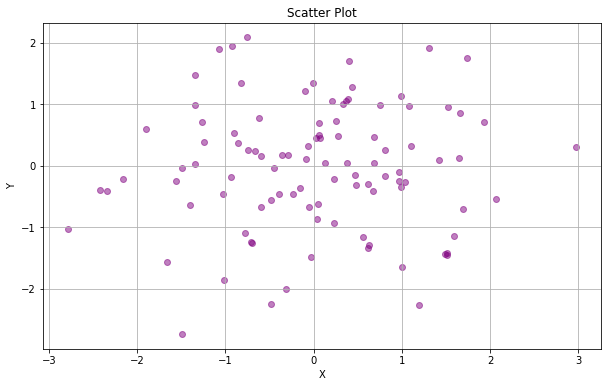

In [51]:

np.random.seed(0)

# Bar plot
plt.figure(figsize=(10, 6))
categories = ['A', 'B', 'C', 'D']
values = np.random.randint(1, 10, size=len(categories))
plt.bar(categories, values, color='skyblue')
plt.title('Bar Plot')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.grid(True)

plt.show()

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, density=True, alpha=0.7, color='green')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
data1 = np.random.normal(0, 1, 100)
data2 = np.random.normal(1, 2, 100)
data3 = np.random.normal(2, 1.5, 100)
plt.boxplot([data1, data2, data3], vert=True, patch_artist=True, notch=True, labels=['Data 1', 'Data 2', 'Data 3'])
plt.title('Boxplot')
plt.xlabel('Dataset')
plt.ylabel('Value')
plt.grid(True)

plt.show()

# Line plot
plt.figure(figsize=(10, 6))
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x, y1, linestyle='-', marker='o', color='blue', label='sin(x)')
plt.plot(x, y2, linestyle='--', marker='s', color='red', label='cos(x)')
plt.title('Line Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
x = np.random.randn(100)
y = np.random.randn(100)
plt.scatter(x, y, color='purple', alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

plt.show()


#### Plot sine wave over the linear space of 0-10 having 100 steps in between and check different:
- markers [o, v, s, ^] 
- color [red, green ,.. ] 
- linestyle [-, -., ...] figure size of plt.figure

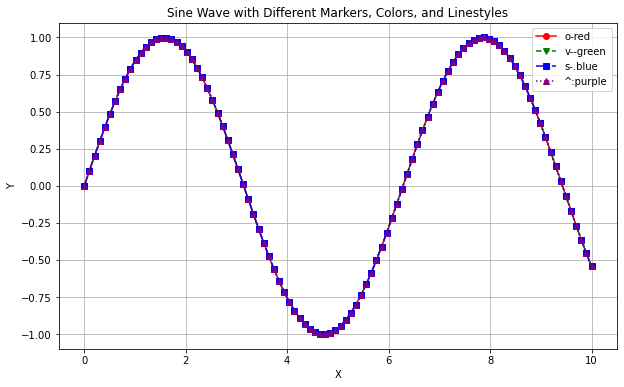

In [54]:


# Generate data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Define styles
markers = ['o', 'v', 's', '^']
colors = ['red', 'green', 'blue', 'purple']
linestyles = ['-', '--', '-.', ':']

# Plotting
plt.figure(figsize=(10, 6))  # Figure size
for i, (marker, color, linestyle) in enumerate(zip(markers, colors, linestyles)):
    plt.plot(x, y, marker=marker, color=color, linestyle=linestyle, label=f'{marker}{linestyle}{color}')

plt.title('Sine Wave with Different Markers, Colors, and Linestyles')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


#### Using Axes: 
- Multiple plot in same axes [Sine and cos]
- Multiple plots in different axes
- Multiple plots using plt.subplots (draw 4 different plots in a 2x2 grid)

- Multiple plot in same axes [Sine and cos] :

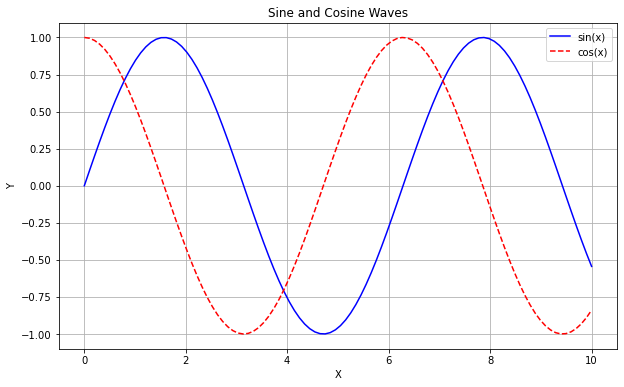

In [59]:
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Plotting in the same axes
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='sin(x)', color='blue')
plt.plot(x, y2, label='cos(x)', color='red', linestyle='--')
plt.title('Sine and Cosine Waves')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

- Multiple plots in different axes:

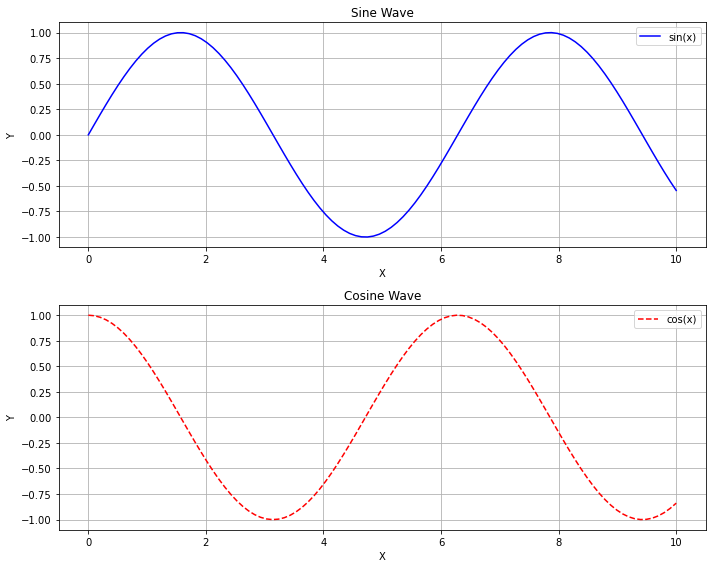

In [65]:

# Generate data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Plotting in different axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot for ax1
ax1.plot(x, y1, label='sin(x)', color='blue')
ax1.set_title('Sine Wave')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.legend()
ax1.grid(True)

# Plot for ax2
ax2.plot(x, y2, label='cos(x)', color='red', linestyle='--')
ax2.set_title('Cosine Wave')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


- Multiple plots using plt.subplots (draw 4 different plots in a 2x2 grid) :

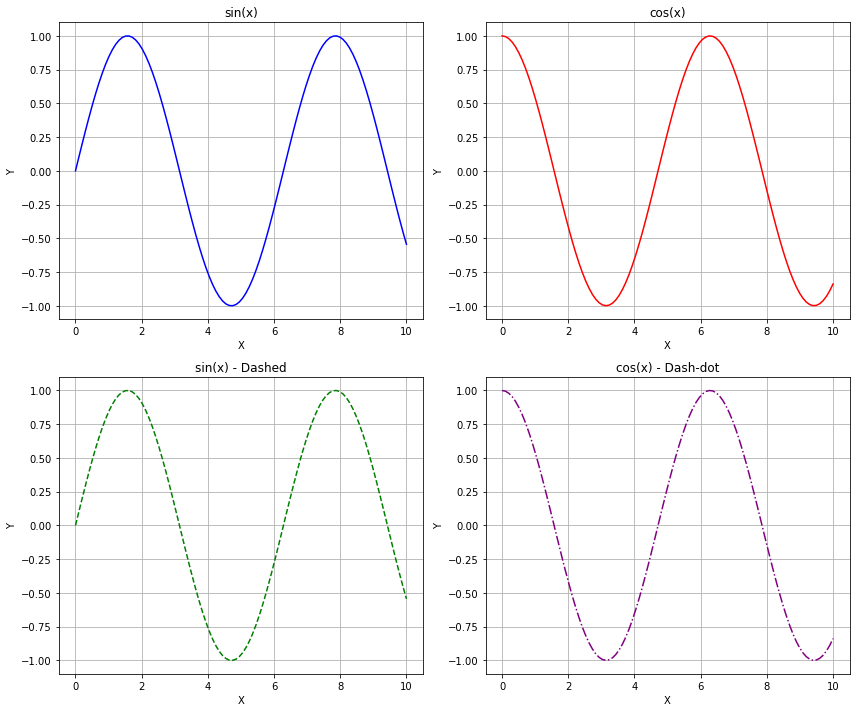

In [67]:
# Generate data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Plotting using plt.subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: sin(x)
axs[0, 0].plot(x, y1, color='blue')
axs[0, 0].set_title('sin(x)')
axs[0, 0].set_xlabel('X')
axs[0, 0].set_ylabel('Y')
axs[0, 0].grid(True)

# Plot 2: cos(x)
axs[0, 1].plot(x, y2, color='red')
axs[0, 1].set_title('cos(x)')
axs[0, 1].set_xlabel('X')
axs[0, 1].set_ylabel('Y')
axs[0, 1].grid(True)

# Plot 3: sin(x) in another style
axs[1, 0].plot(x, y1, linestyle='--', color='green')
axs[1, 0].set_title('sin(x) - Dashed')
axs[1, 0].set_xlabel('X')
axs[1, 0].set_ylabel('Y')
axs[1, 0].grid(True)

# Plot 4: cos(x) in another style
axs[1, 1].plot(x, y2, linestyle='-.', color='purple')
axs[1, 1].set_title('cos(x) - Dash-dot')
axs[1, 1].set_xlabel('X')
axs[1, 1].set_ylabel('Y')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

In [68]:
# Load Iris dataset from Seaborn
iris = sns.load_dataset('iris')

# Display the first few rows of the dataset
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


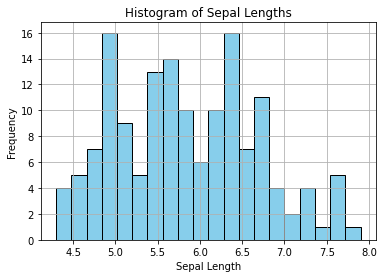

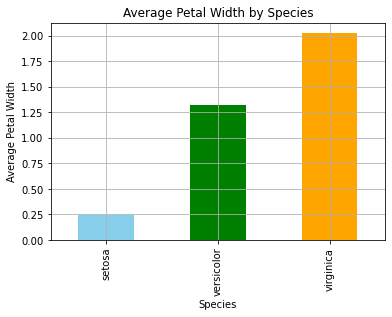

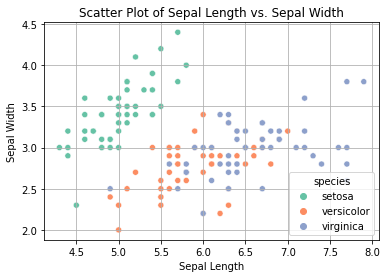

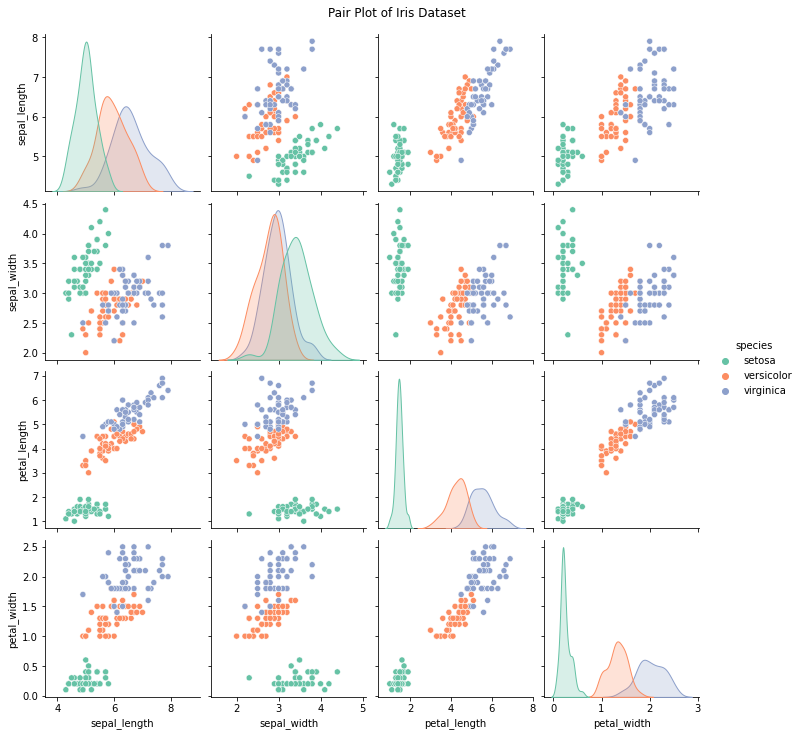

In [69]:
# Histogram of sepal lengths
iris['sepal_length'].plot.hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Sepal Lengths')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
# Bar plot of average petal widths by species
avg_petal_width = iris.groupby('species')['petal_width'].mean()
avg_petal_width.plot(kind='bar', color=['skyblue', 'green', 'orange'])
plt.title('Average Petal Width by Species')
plt.xlabel('Species')
plt.ylabel('Average Petal Width')
plt.grid(True)
plt.show()
# Scatter plot of sepal length vs. sepal width
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris, hue='species', palette='Set2')
plt.title('Scatter Plot of Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.grid(True)
plt.show()
# Scatter matrix (pair plot) of all numerical variables
sns.pairplot(iris, hue='species', palette='Set2')
plt.suptitle('Pair Plot of Iris Dataset', y=1.02)
plt.show()


#### Plot using Seaborn using mpg dataset:


In [76]:

# Load the dataset
mpg = sns.load_dataset("mpg")

# Display the first few rows of the dataset
mpg.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


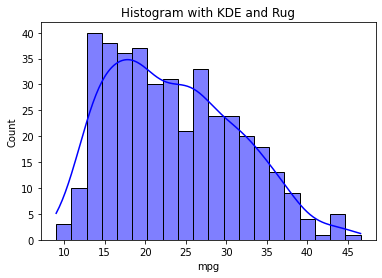

In [78]:
sns.histplot(mpg['mpg'], kde=True, bins=20, color='blue')
plt.title('Histogram with KDE and Rug')
plt.show()


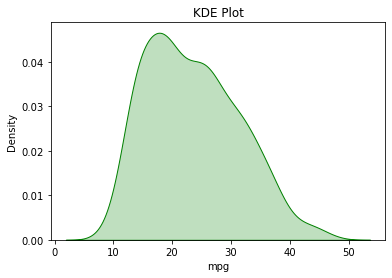

In [79]:
sns.kdeplot(mpg['mpg'], shade=True, color='green')
plt.title('KDE Plot')
plt.show()


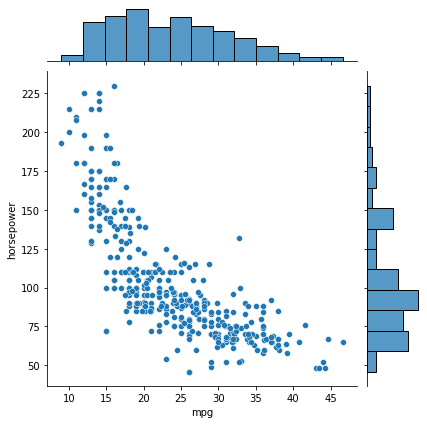

In [81]:
sns.jointplot(data=mpg, x='mpg', y='horsepower', kind='scatter')
plt.show()

sns.jointplot(data=mpg, x='mpg', y='horsepower', kind='hex')
plt.show()


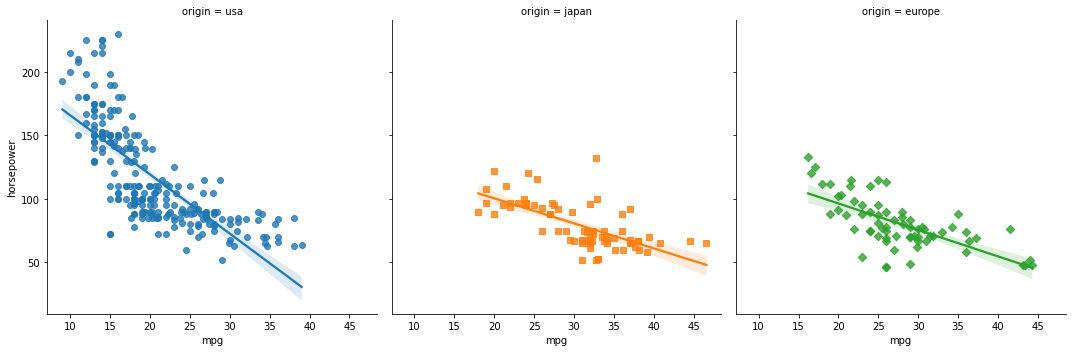

In [82]:
sns.lmplot(data=mpg, x='mpg', y='horsepower', hue='origin', col='origin', markers=['o', 's', 'D'])
plt.show()


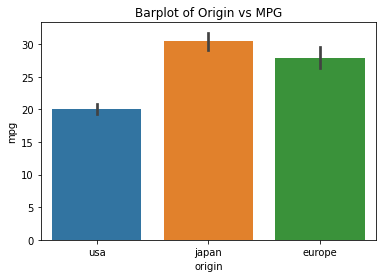

In [86]:
sns.barplot(data=mpg, x='origin', y='mpg', estimator=np.mean)
plt.title('Barplot of Origin vs MPG')
plt.show()


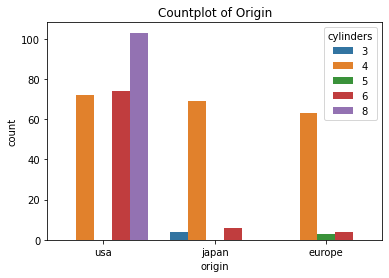

In [87]:
sns.countplot(data=mpg, x='origin', hue='cylinders')
plt.title('Countplot of Origin')
plt.show()


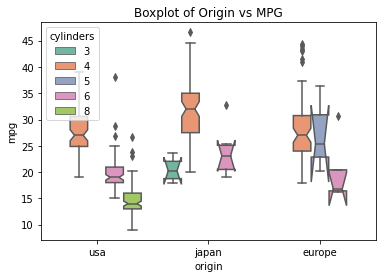

In [88]:
sns.boxplot(data=mpg, x='origin', y='mpg', notch=True, palette='Set2', hue='cylinders')
plt.title('Boxplot of Origin vs MPG')
plt.show()


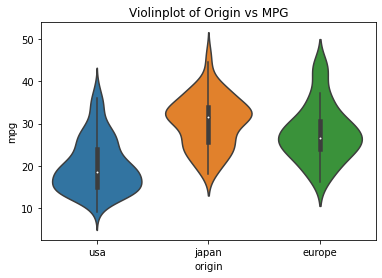

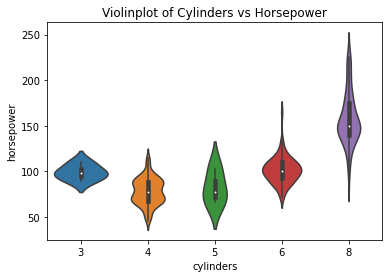

In [89]:
sns.violinplot(data=mpg, x='origin', y='mpg')
plt.title('Violinplot of Origin vs MPG')
plt.show()

sns.violinplot(data=mpg, x='cylinders', y='horsepower')
plt.title('Violinplot of Cylinders vs Horsepower')
plt.show()


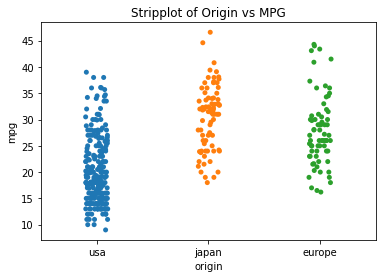

C:\Users\bisra\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


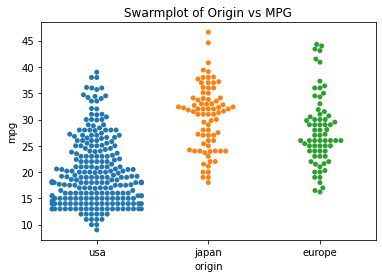

C:\Users\bisra\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


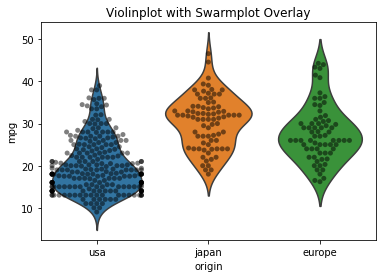

In [90]:
sns.stripplot(data=mpg, x='origin', y='mpg', jitter=True)
plt.title('Stripplot of Origin vs MPG')
plt.show()

sns.swarmplot(data=mpg, x='origin', y='mpg')
plt.title('Swarmplot of Origin vs MPG')
plt.show()

sns.violinplot(data=mpg, x='origin', y='mpg', inner=None)
sns.swarmplot(data=mpg, x='origin', y='mpg', color='k', alpha=0.5)
plt.title('Violinplot with Swarmplot Overlay')
plt.show()


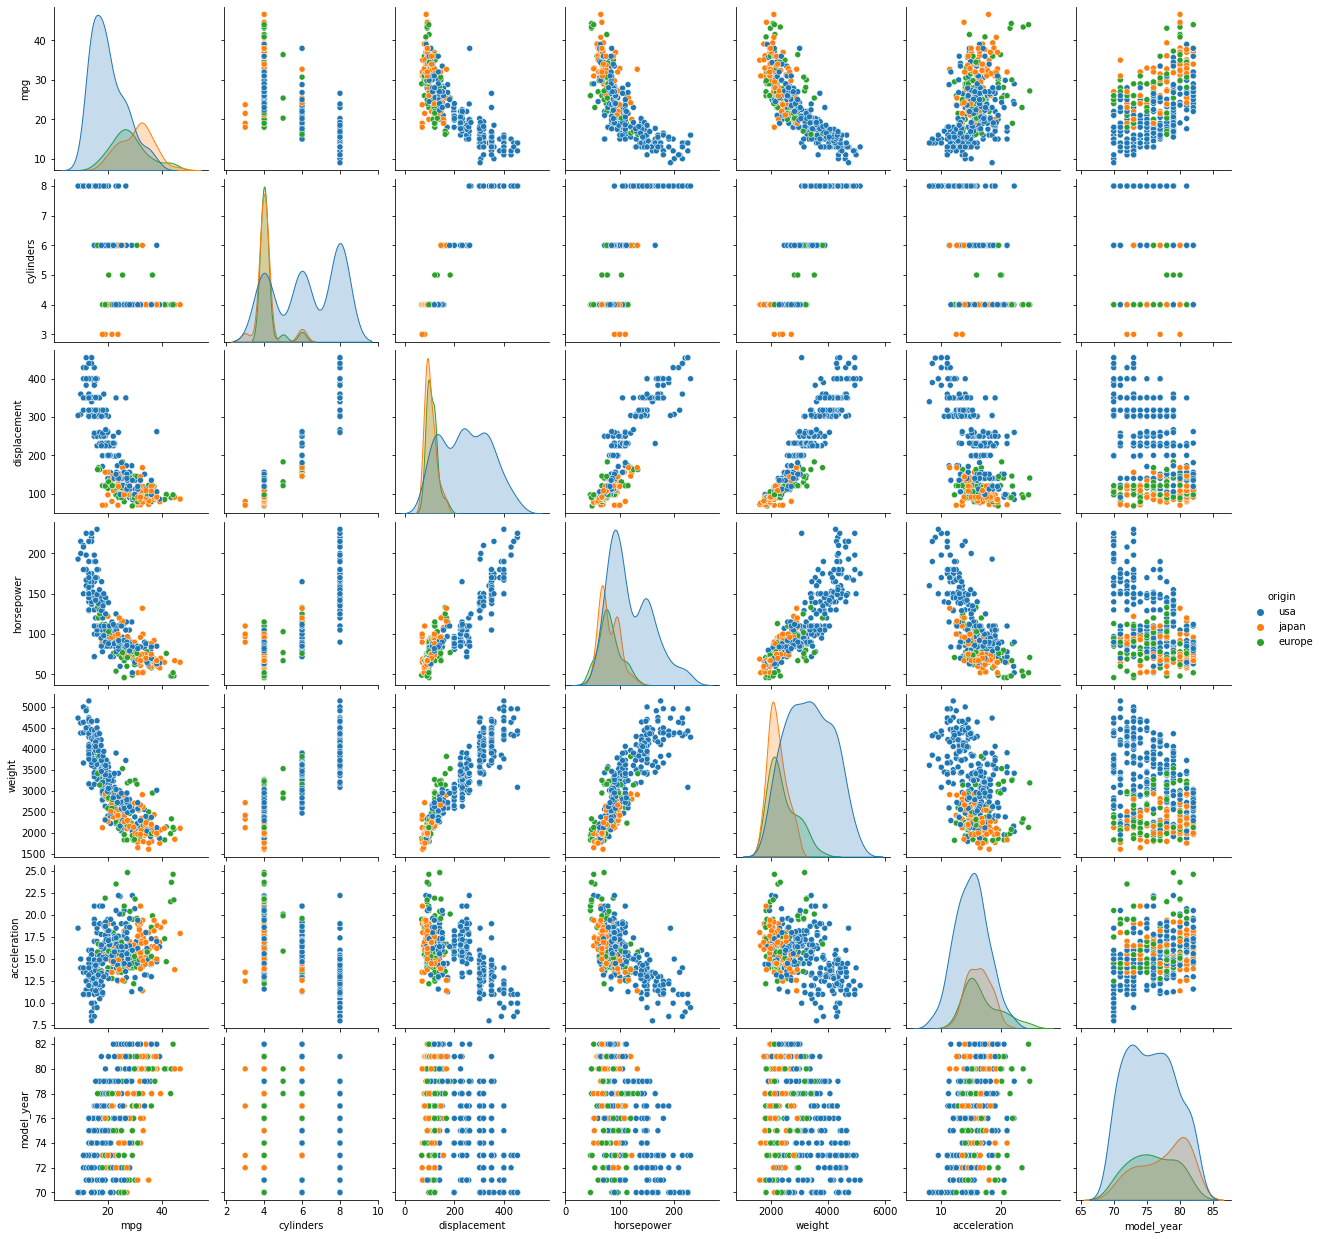

In [91]:
sns.pairplot(mpg, hue='origin')
plt.show()


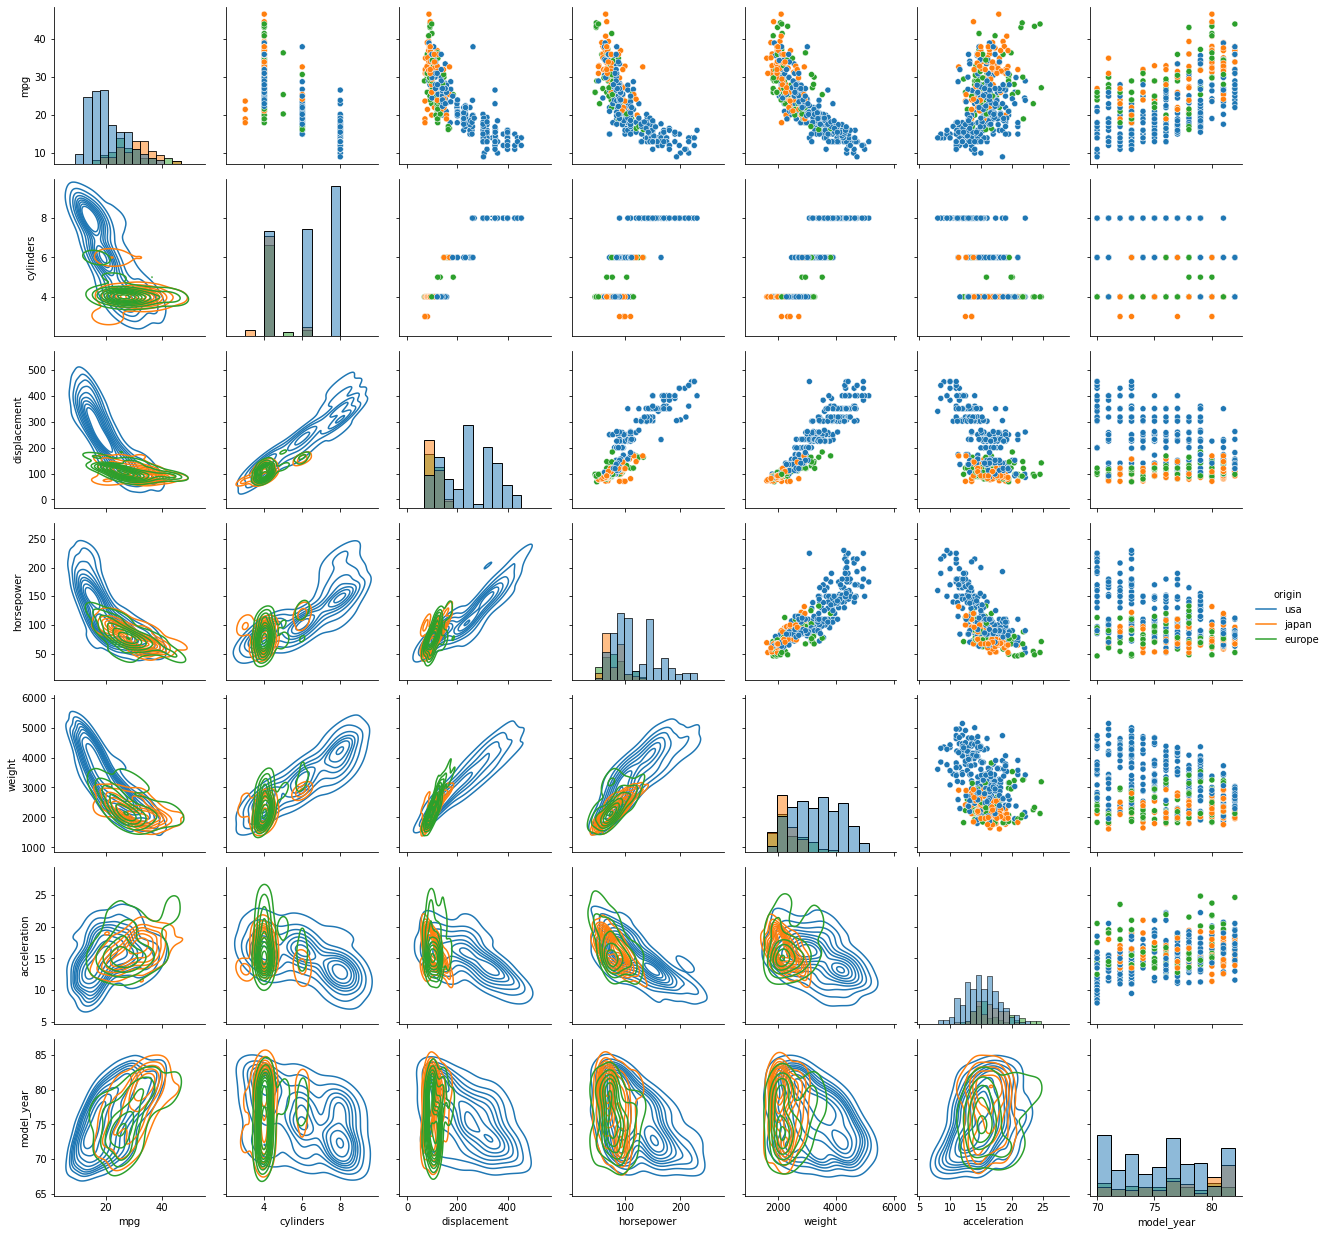

In [92]:
g = sns.PairGrid(mpg, hue='origin')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)
g.add_legend()
plt.show()


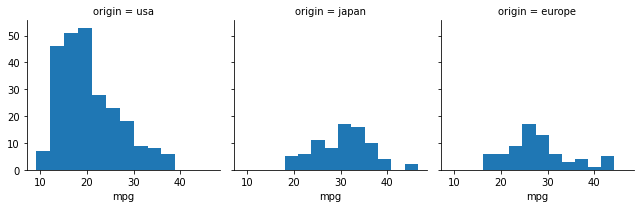

In [93]:
g = sns.FacetGrid(mpg, col='origin')
g.map(plt.hist, 'mpg')
plt.show()


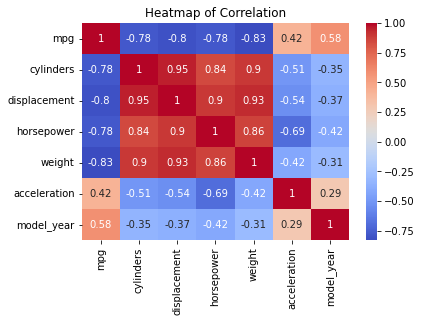

In [94]:
corr = mpg.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation')
plt.show()
